# BE réseaux de neurones par Gout Numa et Goutal Joad

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exemple de réseaux de neurones sans couche cachée

In [3]:
# La sortie Y=1 si x1=1 (ou bien y=x1 and x3)
# Pas de hidden couche, donc les résultats ne seront pas top.
# La fonction de combinaison (ici une sigmoide)
def sigmoide(x) : return 1/(1+np.exp(-x))
# Et sa dérivée
def derivee_de_sigmoide(x) : return x*(1-x)

In [21]:
# Les entrées
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

In [22]:
# Les sorties (ici un vecteur)
Y = np.array([[0,0,1,1]]).T # Transposé

In [34]:
def RN_une_couche(X, Y):
    # On utilise seed pour rendre les calculs déterministes.
    np.random.seed(1)
    # Initialisation aléatoire des poids (avec une moyenne = 0)
    synapse0 = 2*np.random.random((3,1)) -1
    couche_entree = X
    suivi_sortie = []
    suivi_erreur = []
    for iter in range(10000): # On peut augmenter !
        # propagation vers l’avant (forward)
        couche_sortie = sigmoide(np.dot(couche_entree,synapse0)) # dot multiplication
        
        # Quelle est l’erreur (l’écart entre les sorties calculées et attendues)
        erreur_couche_sortie = Y - couche_sortie
        suivi_erreur.append(erreur_couche_sortie)
        
        # Multiplier l’erreur (l’écart) par la pente du ïsigmode pour les valeurs dans couche_sortie
        delta_couche_sortie = erreur_couche_sortie * derivee_de_sigmoide(couche_sortie)
        
        # Mise àjour des poids : rétropropagation
        synapse0 += np.dot(couche_entree.T,delta_couche_sortie)
        if iter%1000 == 0:
            suivi_sortie.append(couche_sortie)
    suivi_sortie.append(couche_sortie)
    
    return (couche_sortie, suivi_sortie, suivi_erreur)

In [31]:
print ("Les sorties après l’apprentissage :")
RN_une_couche(X, Y)[0]

Les sorties après l’apprentissage :


array([[0.00966449],
       [0.00786506],
       [0.99358898],
       [0.99211957]])

In [33]:
suivi_sortie = RN_une_couche(X, Y)[1]
for i in range(len(suivi_sortie)):
    print('Couche sortie itération '+str(i*1000)+' :')
    print(str(suivi_sortie[i])+'\n')

Couche sortie itération 0 :
[[0.2689864 ]
 [0.36375058]
 [0.23762817]
 [0.3262757 ]]

Couche sortie itération 1000 :
[[0.03176745]
 [0.02575143]
 [0.97907779]
 [0.97416005]]

Couche sortie itération 2000 :
[[0.02210122]
 [0.01793507]
 [0.985409  ]
 [0.98200541]]

Couche sortie itération 3000 :
[[0.0179128 ]
 [0.01454746]
 [0.98815758]
 [0.98540875]]

Couche sortie itération 4000 :
[[0.01544409]
 [0.0125494 ]
 [0.98978021]
 [0.98741602]]

Couche sortie itération 5000 :
[[0.01377152]
 [0.01119485]
 [0.99088089]
 [0.98877656]]

Couche sortie itération 6000 :
[[0.01254323]
 [0.01019961]
 [0.99168995]
 [0.98977602]]

Couche sortie itération 7000 :
[[0.01159234]
 [0.0094288 ]
 [0.99231678]
 [0.99054995]]

Couche sortie itération 8000 :
[[0.01082824]
 [0.00880917]
 [0.99282079]
 [0.99117199]]

Couche sortie itération 9000 :
[[0.01019693]
 [0.00829707]
 [0.99323743]
 [0.991686  ]]

Couche sortie itération 10000 :
[[0.00966449]
 [0.00786506]
 [0.99358898]
 [0.99211957]]



Text(0.5, 1.0, 'Erreur couche sortie en fonction des itérations pour chaque individu')

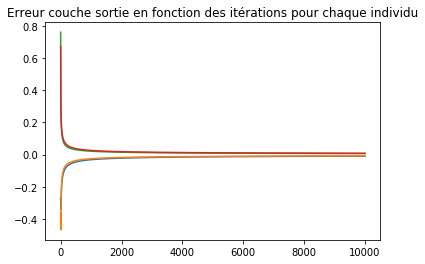

In [37]:
suivi_erreur = RN_une_couche(X, Y)[2]
for i in range(len(suivi_erreur[0])):
    erreur_individu = [suivi_erreur[j][i] for j in range(len(suivi_erreur))]
    plt.plot(erreur_individu)
plt.title('Erreur couche sortie en fonction des itérations pour chaque individu')

In [38]:
X_complt = np.array([[0, 0, 0], 
                     [0, 0, 1], 
                     [0, 1, 0], 
                     [0, 1, 1], 
                     [1, 0, 0], 
                     [1, 0, 1], 
                     [1, 1, 0], 
                     [1, 1, 1]])

Y_x = np.array([[0, 0, 0, 0, 1, 1, 1, 1]]).T
Y_et = np.array([[0, 0, 0, 0, 0, 1, 0, 1]]).T

In [39]:
print("Sortie après l'apprentissage pour y = x1 :")
print(RN_une_couche(X_complt, Y_x)[0])
print("\n Sortie après l'apprentissage pour y = x1&x3 :")
print(RN_une_couche(X_complt, Y_et)[0])

Sortie après l'apprentissage pour y = x1 :
[[5.00000000e-01]
 [1.45083616e-02]
 [1.45083616e-02]
 [2.16688937e-04]
 [9.99997245e-01]
 [9.99812924e-01]
 [9.99812924e-01]
 [9.87449870e-01]]

 Sortie après l'apprentissage pour y = x1&x3 :
[[0.5       ]
 [0.61469127]
 [0.19762168]
 [0.28208343]
 [0.61469127]
 [0.71791657]
 [0.28208343]
 [0.38530873]]


Notre RN apprend bien lorsque qu'il s'agit de relation directe, comme $y = x_1$. Pour d'autre relation un tout petit plus complexe il n'y arrive pas très bien. C'est le cas de $y = x_1 \text{ and } x_3$

## Un exemple plus compliqué

In [94]:
def sigmoide_et_sa_derivee(x,deriv=False):
    if(deriv==True):
        return np.exp(-x)/((1+np.exp(-x))**2)
    return 1/(1+np.exp(-x))

In [117]:
def RN_couche_cachee(X, y, fonction_activation):
    # On utilise seed pour rendre les calculs déterministes.
    np.random.seed(1)
    
    # Initialisation aléatoire des poids (avec une moyenne = 0 et écart􀀀type=1)
    # Ici, on met la moyenne à zéro, le std ne change pas.
    
    # L’écriture X = b*np.random.random((3,4)) - a
    # permet un tirage dans [a,b)], ici entre b=1 et a=-1 (donc moyenne=0)
    synapse0 = 2*np.random.random((3,4)) - 1
    synapse1 = 2*np.random.random((4,1)) - 1
    couche_entree = X
    nb_iterations = 100000
    err = []
    for j in range(nb_iterations):
        # propagation vers l’avant (forward)
        # couche_entree = X
        ponderation_cachee = np.dot(couche_entree,synapse0)
        couche_cachee = fonction_activation(ponderation_cachee)
        ponderation_sortie = np.dot(couche_cachee,synapse1)
        couche_sortie = fonction_activation(ponderation_sortie)
        
        # erreur ?
        erreur_couche_sortie = y - couche_sortie
        
        moy=np.mean(np.abs(erreur_couche_sortie))
        err.append(abs(moy))
            
        # pondération par l’erreur (si pente douce, ne pas trop changer sinon, changer pondérations,
        delta_couche_sortie = erreur_couche_sortie*fonction_activation(ponderation_sortie,deriv=True)
        
        # Quelle est la contribution de couche_cachee àl’erreur de couche_sortie
        # (suivant les pondérations)?
        error_couche_cachee = delta_couche_sortie.dot(synapse1.T)
        
        # Quelle est la "direction" de couche_cachee (dérivée) ?
        # Si OK, ne pas trop changer la valeur.
        delta_couche_cachee = error_couche_cachee * fonction_activation(ponderation_cachee,deriv=True)
        synapse1 += couche_cachee.T.dot(delta_couche_sortie)
        synapse0 += couche_entree.T.dot(delta_couche_cachee)
    return couche_sortie, synapse0, synapse1, err

In [153]:
# Les entrées
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
# Les sorties (ici un vecteur)
Y = np.array([[0, 1, 1, 0]]).T # Transposé

print ("Résultat de l’apprentissage :")
RN_couche_cachee(X, Y, sigmoide_et_sa_derivee)[0]

Résultat de l’apprentissage :


array([[0.00199094],
       [0.99751458],
       [0.99771098],
       [0.00294418]])

Testons notre réseaux entrainé avec cette table de valeur 

| x_1 | x_2 | x_3 | Sorties |
|-----|-----|-----|---------|
| 1   | 0   | 0   | 1       |
| 0   | 0   | 0   | 0       |
| 0   | 1   | 0   | 1       |

et comparons les prédictions à la vérité.

In [67]:
# entrées à tester
X_test = np.array([[1, 0, 0], 
                   [0, 0, 0], 
                   [0, 1, 0]])

# Sorties théoriques
Y_test = np.array([[1, 0, 1]]).T

# On teste notre réseaux sur d'autre input
reseau_entraine = RN_couche_cachee(X, Y, sigmoide_et_sa_derivee)
couche_cachee = sigmoide_et_sa_derivee(np.dot(X_test, reseau_entraine[1]))
couche_sortie = sigmoide_et_sa_derivee(np.dot(couche_cachee, reseau_entraine[2]))
print('Prédiction sortie : ')
couche_sortie

In [73]:
# Nous allons calculer le risque de l'estimateur pour la fonction de perte des moindres carrés
erreur = 1/2*(couche_sortie - Y_test)**2
risque = erreur.mean()
risque

0.09722857334304187

On change de table de vérité et on choisit la table $x_1 \wedge x_2 \wedge \neg x_3$

Sortie après l'apprentissage sigmoide : 
[[2.48028228e-04]
 [1.33210181e-09]
 [2.12695899e-03]
 [4.50353795e-05]
 [2.33382335e-03]
 [4.13944977e-05]
 [9.96477784e-01]
 [8.60003635e-04]]


Text(0.5, 1.0, "Courbe d'erreur, sigmoide")

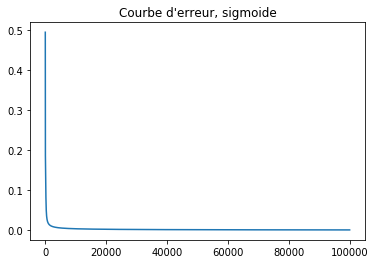

In [146]:
X_complt = np.array([[0, 0, 0], 
                     [0, 0, 1], 
                     [0, 1, 0], 
                     [0, 1, 1], 
                     [1, 0, 0], 
                     [1, 0, 1], 
                     [1, 1, 0], 
                     [1, 1, 1]])

Y = np.array([[0, 0, 0, 0, 0, 0, 1, 0]]).T

reseau_entraine = RN_couche_cachee(X_complt, Y, sigmoide_et_sa_derivee)
print("Sortie après l'apprentissage sigmoide : ")
print(reseau_entraine[0])
plt.plot(reseau_entraine[3])
plt.title("Courbe d'erreur, sigmoide")

In [113]:
def tangente_hyperbolique_et_derivee(x, deriv = False):
    if deriv:
        return (1-np.tanh(x)**2)/2
    return (np.tanh(x)+1)/2

In [114]:
def gaussienne_et_derivee(x, deriv = False):
    if deriv:
        return -2*x*np.exp(-x**2)
    return np.exp(-x**2)

In [115]:
def arctangente_et_derivee(x, deriv = False):
    if deriv:
        return 1/(1+x**2)
    return (np.arctan(x)+np.pi/2)*(1/np.pi)

Sortie après l'apprentissage sigmoide : 
[[2.48028228e-04]
 [1.33210181e-09]
 [2.12695899e-03]
 [4.50353795e-05]
 [2.33382335e-03]
 [4.13944977e-05]
 [9.96477784e-01]
 [8.60003635e-04]]


Sortie après l'apprentissage tanh : 
[[1.62549247e-04]
 [1.64527392e-10]
 [1.08117330e-03]
 [2.72394605e-05]
 [1.20002904e-03]
 [4.64030896e-05]
 [9.98232511e-01]
 [3.76439574e-04]]


Sortie après l'apprentissage gaussienne : 
[[2.99118789e-29]
 [1.93955032e-09]
 [4.35895422e-04]
 [5.75007787e-10]
 [4.09915565e-04]
 [1.31024660e-04]
 [9.99154419e-01]
 [3.89596673e-04]]


Sortie après l'apprentissage arctan : 
[[0.01413236]
 [0.0052599 ]
 [0.01561055]
 [0.00701101]
 [0.01535571]
 [0.00595065]
 [0.97836843]
 [0.0067402 ]]




Text(0.5, 1.0, "Courbe d'erreur, arctan")

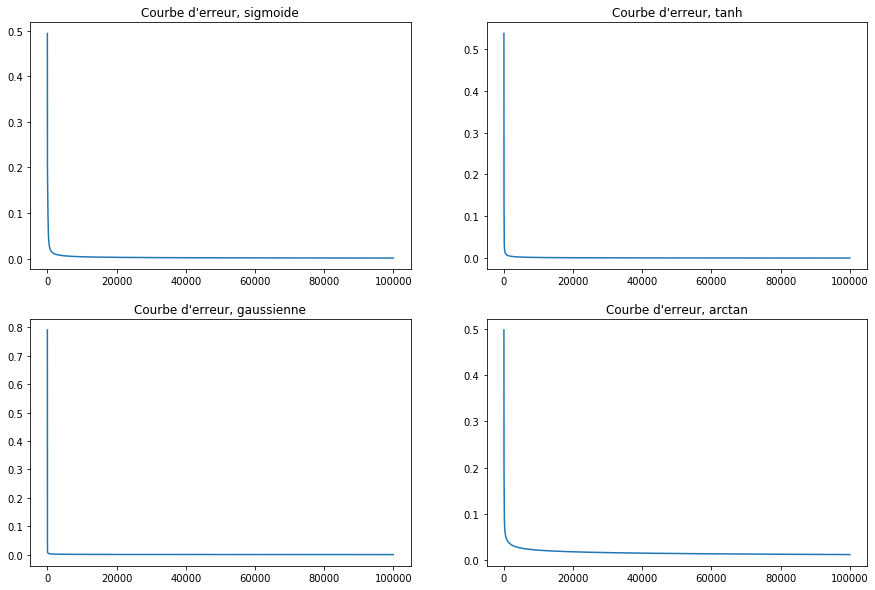

In [125]:
# On trace toutes les erreurs des différentes fonctions d'activation
fig = plt.figure(figsize = (15, 10))

#Sigmoide
reseau_entraine = RN_couche_cachee(X_complt, Y, sigmoide_et_sa_derivee)
print("Sortie après l'apprentissage sigmoide : ")
print(reseau_entraine[0])
print('\n')
ax = fig.add_subplot(2, 2, 1)
ax.plot(reseau_entraine[3])
ax.set_title("Courbe d'erreur, sigmoide")

#Tangente hyperbolique
reseau_entraine = RN_couche_cachee(X_complt, Y, tangente_hyperbolique_et_derivee)
print("Sortie après l'apprentissage tanh : ")
print(reseau_entraine[0])
print('\n')
ax = fig.add_subplot(2, 2, 2)
ax.plot(reseau_entraine[3])
ax.set_title("Courbe d'erreur, tanh")

#Gaussienne
reseau_entraine = RN_couche_cachee(X_complt, Y, gaussienne_et_derivee)
print("Sortie après l'apprentissage gaussienne : ")
print(reseau_entraine[0])
print('\n')
ax = fig.add_subplot(2, 2, 3)
ax.plot(reseau_entraine[3])
ax.set_title("Courbe d'erreur, gaussienne")

#Arctangente
reseau_entraine = RN_couche_cachee(X_complt, Y, arctangente_et_derivee)
print("Sortie après l'apprentissage arctan : ")
print(reseau_entraine[0])
print('\n')
ax = fig.add_subplot(2, 2, 4)
ax.plot(reseau_entraine[3])
ax.set_title("Courbe d'erreur, arctan")

**Maintenant on créer un RN avec 2 couches cachées**

In [150]:
def RN_2_couches_cachees(X, y, fonction_activation):
    # On utilise seed pour rendre les calculs déterministes.
    np.random.seed(1)
    
    # Initialisation aléatoire des poids (avec une moyenne = 0 et écart􀀀type=1)
    # Ici, on met la moyenne à zéro, le std ne change pas.
    
    # L’écriture X = b*np.random.random((3,4)) - a
    # permet un tirage dans [a,b)], ici entre b=1 et a=-1 (donc moyenne=0)
    synapse0 = 2*np.random.random((3,2)) - 1
    synapse1 = 2*np.random.random((2,4)) - 1
    synapse2 = 2*np.random.random((4,1)) - 1
    couche_entree = X
    nb_iterations = 100000
    err = []
    for j in range(nb_iterations):
        # propagation vers l’avant (forward)
        # couche_entree = X
        ponderation_cachee1 = np.dot(couche_entree,synapse0)
        couche_cachee1 = fonction_activation(ponderation_cachee1)
        ponderation_cachee2 = np.dot(couche_cachee1,synapse1)
        couche_cachee2 = fonction_activation(ponderation_cachee2)
        ponderation_sortie = np.dot(couche_cachee2,synapse2)
        couche_sortie = fonction_activation(ponderation_sortie)
        
        # erreur ?
        erreur_couche_sortie = y - couche_sortie
        
        moy=np.mean(np.abs(erreur_couche_sortie))
        err.append(abs(moy))
            
        # pondération par l’erreur (si pente douce, ne pas trop changer sinon, changer pondérations,
        delta_couche_sortie = erreur_couche_sortie*fonction_activation(ponderation_sortie,deriv=True)
        
        # Quelle est la contribution de couche_cachee àl’erreur de couche_sortie
        # (suivant les pondérations)?
        error_couche_cachee2 = delta_couche_sortie.dot(synapse2.T)
        delta_couche_cachee2 = error_couche_cachee2 * fonction_activation(ponderation_cachee2,deriv=True)

        error_couche_cachee1 = delta_couche_cachee2.dot(synapse1.T)
        delta_couche_cachee1 = error_couche_cachee1 * fonction_activation(ponderation_cachee1,deriv=True)
        
        synapse2 += couche_cachee2.T.dot(delta_couche_sortie)
        synapse1 += couche_cachee1.T.dot(delta_couche_cachee2)
        synapse0 += couche_entree.T.dot(delta_couche_cachee1)
    return couche_sortie, synapse0, synapse1, synapse2, err

*On recommence toutes les étapes :*

In [151]:
# Les entrées
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
# Les sorties (ici un vecteur)
Y = np.array([[0, 1, 1, 0]]).T # Transposé

print ("Résultat de l’apprentissage :")
RN_2_couches_cachees(X, Y, sigmoide_et_sa_derivee)[0]

Résultat de l’apprentissage :


array([[0.00236002],
       [0.99624042],
       [0.99907242],
       [0.00222578]])

Testons notre réseaux entrainé avec cette table de valeur 

| x_1 | x_2 | x_3 | Sorties |
|-----|-----|-----|---------|
| 1   | 0   | 0   | 1       |
| 0   | 0   | 0   | 0       |
| 0   | 1   | 0   | 1       |

et comparons les prédictions à la vérité.

In [152]:
# entrées à tester
X_test = np.array([[1, 0, 0], 
                   [0, 0, 0], 
                   [0, 1, 0]])
# Sorties théoriques
Y_test = np.array([[1, 0, 1]]).T

# On teste notre réseaux sur d'autre input
reseau_entraine = RN_2_couches_cachees(X, Y, sigmoide_et_sa_derivee)
couche_cachee1 = sigmoide_et_sa_derivee(np.dot(X_test, reseau_entraine[1]))
couche_cachee2 = sigmoide_et_sa_derivee(np.dot(couche_cachee1, reseau_entraine[2]))
couche_sortie = sigmoide_et_sa_derivee(np.dot(couche_cachee2, reseau_entraine[3]))
print('Prédiction sortie : ')
couche_sortie

Prédiction sortie : 


array([[0.99987699],
       [0.99946124],
       [0.99744242]])

In [141]:
# Nous allons calculer le risque de l'estimateur pour la fonction de perte des moindres carrés
erreur = 1/2*(couche_sortie - Y_test)**2
risque = erreur.mean()
risque

0.13896143536277186

On change de table de vérité et on choisit la table $x_1 \wedge x_2 \wedge \neg x_3$

Sortie après l'apprentissage sigmoide : 
[[3.74291812e-04]
 [2.95676928e-06]
 [1.65265757e-03]
 [4.06845533e-05]
 [1.40016684e-03]
 [2.23513037e-04]
 [9.97414097e-01]
 [5.19171374e-04]]


Text(0.5, 1.0, "Courbe d'erreur 2 couches cachées, sigmoide")

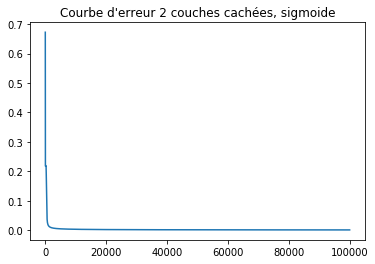

In [144]:
X_complt = np.array([[0, 0, 0], 
                     [0, 0, 1], 
                     [0, 1, 0], 
                     [0, 1, 1], 
                     [1, 0, 0], 
                     [1, 0, 1], 
                     [1, 1, 0], 
                     [1, 1, 1]])

Y = np.array([[0, 0, 0, 0, 0, 0, 1, 0]]).T

reseau_entraine = RN_2_couches_cachees(X_complt, Y, sigmoide_et_sa_derivee)
print("Sortie après l'apprentissage sigmoide : ")
print(reseau_entraine[0])
plt.plot(reseau_entraine[4])
plt.title("Courbe d'erreur 2 couches cachées, sigmoide")

Sortie après l'apprentissage sigmoide : 
[[2.48028228e-04]
 [1.33210181e-09]
 [2.12695899e-03]
 [4.50353795e-05]
 [2.33382335e-03]
 [4.13944977e-05]
 [9.96477784e-01]
 [8.60003635e-04]]


Sortie après l'apprentissage tanh : 
[[1.62549247e-04]
 [1.64527392e-10]
 [1.08117330e-03]
 [2.72394605e-05]
 [1.20002904e-03]
 [4.64030896e-05]
 [9.98232511e-01]
 [3.76439574e-04]]


Sortie après l'apprentissage gaussienne : 
[[2.99118789e-29]
 [1.93955032e-09]
 [4.35895422e-04]
 [5.75007787e-10]
 [4.09915565e-04]
 [1.31024660e-04]
 [9.99154419e-01]
 [3.89596673e-04]]


Sortie après l'apprentissage arctan : 
[[0.01413236]
 [0.0052599 ]
 [0.01561055]
 [0.00701101]
 [0.01535571]
 [0.00595065]
 [0.97836843]
 [0.0067402 ]]




Text(0.5, 1.0, "Courbe d'erreur, arctan")

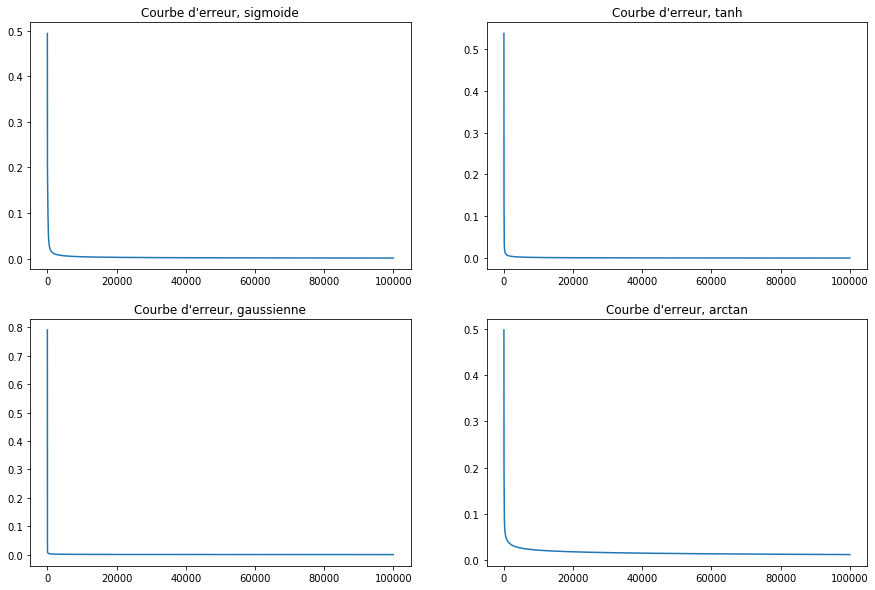

In [145]:
# On trace toutes les erreurs des différentes fonctions d'activation
fig = plt.figure(figsize = (15, 10))

#Sigmoide
reseau_entraine = RN_couche_cachee(X_complt, Y, sigmoide_et_sa_derivee)
print("Sortie après l'apprentissage sigmoide : ")
print(reseau_entraine[0])
print('\n')
ax = fig.add_subplot(2, 2, 1)
ax.plot(reseau_entraine[3])
ax.set_title("Courbe d'erreur, sigmoide")

#Tangente hyperbolique
reseau_entraine = RN_couche_cachee(X_complt, Y, tangente_hyperbolique_et_derivee)
print("Sortie après l'apprentissage tanh : ")
print(reseau_entraine[0])
print('\n')
ax = fig.add_subplot(2, 2, 2)
ax.plot(reseau_entraine[3])
ax.set_title("Courbe d'erreur, tanh")

#Gaussienne
reseau_entraine = RN_couche_cachee(X_complt, Y, gaussienne_et_derivee)
print("Sortie après l'apprentissage gaussienne : ")
print(reseau_entraine[0])
print('\n')
ax = fig.add_subplot(2, 2, 3)
ax.plot(reseau_entraine[3])
ax.set_title("Courbe d'erreur, gaussienne")

#Arctangente
reseau_entraine = RN_couche_cachee(X_complt, Y, arctangente_et_derivee)
print("Sortie après l'apprentissage arctan : ")
print(reseau_entraine[0])
print('\n')
ax = fig.add_subplot(2, 2, 4)
ax.plot(reseau_entraine[3])
ax.set_title("Courbe d'erreur, arctan")